In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from reglas import *

In [2]:
df =pd.read_csv('Datos\Transformados\df_unificado_colores.csv')

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_19020\4054734974.py:1: SyntaxWarning: invalid escape sequence '\T'
  df =pd.read_csv('Datos\Transformados\df_unificado_colores.csv')
C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_19020\4054734974.py:1: DtypeWarning: Columns (11,12,13,16,18,22,23,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv('Datos\Transformados\df_unificado_colores.csv')


In [3]:
df

,ID,Titulo,Temporada,Color,Lookiero,Marca,Caracteristica,Caracteristica1,tipo_prenda,nivel,...,print3,sleeve_long_cm1,sleeve_long_cm2,style1,style2,style3,tipo_prenda2,weather,Salto_talla,color_nivel
0,6549c1b1-989e-432a-bdc9-b603c438b310,Onleden Sweater knt,9,yellow,M,BRAND119,sweaters,top_type,sweater,2,...,NaN,58.0,NaN,classic,boho,NaN,jersey,warm,3,54
1,6549c1b1-989e-432a-bdc9-b603c438b310,Onleden Sweater knt,9,yellow,M,BRAND119,two,adventurous,sweater,2,...,NaN,58.0,NaN,classic,boho,NaN,jersey,warm,3,54
2,6549c1b1-989e-432a-bdc9-b603c438b310,Onleden Sweater knt,9,yellow,M,BRAND119,without_closing,closing,sweater,2,...,NaN,58.0,NaN,classic,boho,NaN,jersey,warm,3,54
3,6549c1b1-989e-432a-bdc9-b603c438b310,Onleden Sweater knt,9,yellow,M,BRAND119,warm_season,weather,sweater,2,...,NaN,58.0,NaN,classic,boho,NaN,jersey,warm,3,54
4,6549c1b1-989e-432a-bdc9-b603c438b310,Onleden Sweater knt,9,yellow,M,BRAND119,closed_round_neckline,neckline,sweater,2,...,NaN,58.0,NaN,classic,boho,NaN,jersey,warm,3,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198598,22efc184-5ecb-401d-8dea-9569ceae492d,Jara Short pant,9,purple,L,BRAND15,38,waist_contour,short,1,...,NaN,NaN,NaN,boho,classic,NaN,pantalones,warm,4,112
198599,22efc184-5ecb-401d-8dea-9569ceae492d,Jara Short pant,9,purple,L,BRAND15,38,long_cm,short,1,...,NaN,NaN,NaN,boho,classic,NaN,pantalones,warm,4,112
198600,22efc184-5ecb-401d-8dea-9569ceae492d,Jara Short pant,9,purple,L,BRAND15,true,rubber_waist,short,1,...,NaN,NaN,NaN,boho,classic,NaN,pantalones,warm,4,112
198601,22efc184-5ecb-401d-8dea-9569ceae492d,Jara Short pant,9,purple,L,BRAND15,true,gripper,short,1,...,NaN,NaN,NaN,boho,classic,NaN,pantalones,warm,4,112


In [4]:
df['ID_color'] = df['ID'] + df['Color']

prendas = df['ID_color'].unique().tolist()
len(prendas)

1732

In [5]:
df_grafo = df[['ID_color', 'nivel', 'Color', 'color_nivel', 'Temporada', 'Marca', 'ID','tipo_prenda2','long_cm1','sleeve_long_cm1','print1','print2','print3','style1','style2','style3','fit1','fit2','weather','Salto_talla']]
df_grafo = df_grafo.drop_duplicates()
df_grafo['ID_nuevo'] = [i for i in range(1, len(df_grafo)+1)]

In [6]:
df_grafo['color_nivel'].nunique()

43

In [7]:
colores = ['red', 'blue', 'green']
color_nodo = [colores[i-1] for i in df_grafo['nivel']]

In [8]:
df_grafo

,ID_color,nivel,Color,color_nivel,Temporada,Marca,ID,tipo_prenda2,long_cm1,sleeve_long_cm1,...,print2,print3,style1,style2,style3,fit1,fit2,weather,Salto_talla,ID_nuevo
0,6549c1b1-989e-432a-bdc9-b603c438b310yellow,2,yellow,54,9,BRAND119,6549c1b1-989e-432a-bdc9-b603c438b310,jersey,58.0,58.0,...,NaN,NaN,classic,boho,NaN,loose,NaN,warm,3,1
23,6549c1b1-989e-432a-bdc9-b603c438b310ecru,2,ecru,51,9,BRAND119,6549c1b1-989e-432a-bdc9-b603c438b310,jersey,58.0,58.0,...,NaN,NaN,classic,boho,NaN,loose,NaN,warm,3,2
46,6549c1b1-989e-432a-bdc9-b603c438b310ecru,2,ecru,51,9,BRAND119,6549c1b1-989e-432a-bdc9-b603c438b310,jersey,58.0,58.0,...,NaN,NaN,classic,boho,NaN,loose,NaN,warm,1,3
69,6549c1b1-989e-432a-bdc9-b603c438b310blue_dark,2,blue_dark,100,9,BRAND119,6549c1b1-989e-432a-bdc9-b603c438b310,jersey,58.0,58.0,...,NaN,NaN,classic,boho,NaN,loose,NaN,warm,1,4
92,6549c1b1-989e-432a-bdc9-b603c438b310blue_dark,2,blue_dark,100,9,BRAND119,6549c1b1-989e-432a-bdc9-b603c438b310,jersey,58.0,58.0,...,NaN,NaN,classic,boho,NaN,loose,NaN,warm,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198488,22efc184-5ecb-401d-8dea-9569ceae492dpurple,1,purple,112,9,BRAND15,22efc184-5ecb-401d-8dea-9569ceae492d,pantalones,38.0,NaN,...,NaN,NaN,boho,classic,NaN,straight,NaN,warm,2,7551
198511,22efc184-5ecb-401d-8dea-9569ceae492dred,1,red,12,9,BRAND15,22efc184-5ecb-401d-8dea-9569ceae492d,pantalones,38.0,NaN,...,NaN,NaN,boho,classic,NaN,straight,NaN,warm,2,7552
198534,22efc184-5ecb-401d-8dea-9569ceae492dpurple,1,purple,112,9,BRAND15,22efc184-5ecb-401d-8dea-9569ceae492d,pantalones,38.0,NaN,...,NaN,NaN,boho,classic,NaN,straight,NaN,warm,3,7553
198557,22efc184-5ecb-401d-8dea-9569ceae492dred,1,red,12,9,BRAND15,22efc184-5ecb-401d-8dea-9569ceae492d,pantalones,38.0,NaN,...,NaN,NaN,boho,classic,NaN,straight,NaN,warm,3,7554


In [9]:
prendas_c =df_grafo.set_index('ID_nuevo').to_dict('index')
G_corto = nx.Graph()
G_corto.add_nodes_from(prendas_c)
len(G_corto.nodes)

7555

In [10]:
# Construcción del Grafo
import itertools
prendas_c = {}
df_unicos = df_grafo.copy()
for idx, row in df_unicos.iterrows():
    
    # 1. Color
    try: cn = int(float(row.get('color_nivel', 0)))
    except: cn = 0 
    
    # 2. Sets
    st = {str(row.get(c, '')).lower() for c in ['style1', 'style2', 'style3', 'application1', 'application2', 'application3', 'application4']} - {'nan', '', 'none'}
    pr = {str(row.get(c, '')).lower() for c in ['print1', 'print2', 'print3']}- {'nan', '', 'none'}
    ft = {str(row.get(c, '')).lower() for c in ['fit1', 'fit2']} - {'nan', '', 'none'}
    we = {str(row.get(c, '')).lower() for c in ['weather']} - {'nan', '', 'none'}
    
    # 3. Medidas
    def clean_medida(val):
        try:
            val = float(val)
            return val if pd.notna(val) else None
        except:
            return None

    long_cm = clean_medida(row.get('long_cm1'))
    sleeve_cm = clean_medida(row.get('sleeve_long_cm1'))
    raw_cat = row.get('tipo_prenda2', row.get('sub_category', ''))
    sub_cat = str(raw_cat).lower().strip()
    if sub_cat == 'nan': sub_cat = ''
    raw_tipo = row.get('tipo_prenda2', '')
    tipo_prenda2 = str(raw_tipo).lower().strip()


    prenda_procesada = {
        'id': row['ID_nuevo'],
        'sub_category': sub_cat,      
        'long_cm': long_cm, 
        'sleeve_long_cm': sleeve_cm,   
        'color_nivel': cn,
        'nivel': row.get('nivel'),
        'tipo_prenda':tipo_prenda2,
        'styles': st,
        'has_style': bool(st),
        'prints': pr,
        'is_print': bool(pr),
        'fits': ft,
        'tiempo': we,
        'talla': row.get('Salto_talla')
    }
    
    prendas_c[row['ID_nuevo']] = prenda_procesada
print(f"Iniciando combinaciones con {len(prendas_c)} prendas únicas...")
G_corto = nx.Graph()
G_corto.add_nodes_from(prendas_c.keys())
conteo_intentos = 0
conteo_validos = 0
for id_A, id_B in itertools.combinations(prendas_c.keys(), 2):
    prenda_A = prendas_c[id_A]
    prenda_B = prendas_c[id_B]
    conteo_intentos += 1
    peso = calcular_peso_outfit(prenda_A, prenda_B)
    if peso > 0:
        G_corto.add_edge(id_A, id_B, weight=peso)
        conteo_validos += 1

print(f"Grafo construido: {G_corto.number_of_nodes()} nodos y {G_corto.number_of_edges()} aristas.")

Iniciando combinaciones con 7555 prendas únicas...
Grafo construido: 7555 nodos y 1140880 aristas.


In [11]:
import numpy as np
pesos = [d['weight'] for u, v, d in G_corto.edges(data=True)]
print(f"Calidad Promedio del Armario: {np.mean(pesos):.2f}/1.0")
print(f"Outfits (>0.8): {len([x for x in pesos if x >= 0.8])}")
print(f"Outfits (0.6-0.8): {len([x for x in pesos if 0.6 <= x < 0.8])}")
print(f"Outfits (<0.6): {len([x for x in pesos if x < 0.6])}")

Calidad Promedio del Armario: 0.55/1.0
Outfits (>0.8): 186190
Outfits (0.6-0.8): 240513
Outfits (<0.6): 714177


In [12]:
max_w = max(d['weight'] for u, v, d in G_corto.edges(data=True))
mejores_outfits = [(u, v, d['weight']) for u, v, d in G_corto.edges(data=True) if d['weight'] == max_w]
print(f"Peso Máximo Encontrado: {max_w}")
print(f"Se han encontrado {len(mejores_outfits)} combinaciones con esta nota.")
print("-" * 40)
for id_1, id_2, peso in mejores_outfits[:10]:
    print(f"ID Prenda A: {id_1}  <--->  ID Prenda B: {id_2}  |  Peso: {peso}")

Peso Máximo Encontrado: 0.88
Se han encontrado 40696 combinaciones con esta nota.
----------------------------------------
ID Prenda A: 1  <--->  ID Prenda B: 3516  |  Peso: 0.88
ID Prenda A: 2  <--->  ID Prenda B: 3516  |  Peso: 0.88
ID Prenda A: 3  <--->  ID Prenda B: 3516  |  Peso: 0.88
ID Prenda A: 6  <--->  ID Prenda B: 3516  |  Peso: 0.88
ID Prenda A: 10  <--->  ID Prenda B: 3516  |  Peso: 0.88
ID Prenda A: 11  <--->  ID Prenda B: 3516  |  Peso: 0.88
ID Prenda A: 12  <--->  ID Prenda B: 3516  |  Peso: 0.88
ID Prenda A: 13  <--->  ID Prenda B: 3516  |  Peso: 0.88
ID Prenda A: 14  <--->  ID Prenda B: 3516  |  Peso: 0.88
ID Prenda A: 15  <--->  ID Prenda B: 3516  |  Peso: 0.88


In [13]:
ids_interes = {3516,1}
datos_df = []
for node_id in ids_interes:
    if node_id in prendas_c:
        info = prendas_c[node_id].copy()
        info['styles'] = ", ".join(info['styles']) if info['styles'] else ""
        info['prints'] = ", ".join(info['prints']) if info['prints'] else ""
        info['fits'] = ", ".join(info['fits']) if info['fits'] else ""
        datos_df.append(info)
df_analisis = pd.DataFrame(datos_df)
df_analisis = df_analisis.sort_values('id')
print(df_analisis.to_string())

     id sub_category  long_cm  sleeve_long_cm  color_nivel  nivel tipo_prenda         styles  has_style     prints  is_print   fits  tiempo  talla
0     1       jersey     58.0            58.0           54      2      jersey  classic, boho       True     smooth      True  loose  {warm}      3
1  3516      bufanda      NaN             NaN           11      3     bufanda         street       True  geometric      True         {warm}    100


In [15]:
import networkx as nx
import numpy as np

# ==========================================
# 1. ESTADÍSTICAS BÁSICAS (Traducido)
# ==========================================
n_nodes = G_corto.number_of_nodes()
n_edges = G_corto.number_of_edges()

# Calculamos el grado promedio correctamente (suma de grados / n_nodos)
grados = [d for n, d in G_corto.degree()]
grado_promedio = sum(grados) / n_nodes

print("=== 📊 ESTADÍSTICAS GENERALES ===")
print(f'Número de nodos (Prendas): {n_nodes}')
print(f'Número de aristas (Combinaciones válidas): {n_edges}')
print(f'Grado promedio (Promedio de outfits por prenda): {grado_promedio:.2f}')

# Análisis de nodos aislados
aislados = list(nx.isolates(G_corto))
print(f'¿Tiene nodos aislados (Prendas sin combinación)?: {len(aislados) > 0} (Cantidad: {len(aislados)})')

# Bucles y Dirección
print(f'¿Tiene auto-bucles (Combina consigo misma)?: {nx.number_of_selfloops(G_corto) > 0}')
print(f'¿Es grafo no dirigido?: {not G_corto.is_directed()}')


# ==========================================
# 2. MÉTRICAS DE EXPERTO (Estructurales)
# ==========================================
print("\n=== 🧠 ANÁLISIS DE TOPOLOGÍA (EXPERTO) ===")

# DENSIDAD: Del 0 al 1. 
# Si es muy bajo, tus reglas son muy estrictas. Si es muy alto, "todo vale".
densidad = nx.density(G_corto)
print(f'Densidad del grafo: {densidad:.4f}')

# TRANSITIVIDAD: 
# Si A combina con B, y B con C... ¿A suele combinar con C?
# En moda, esto ayuda a crear "armarios cápsula".
transitividad = nx.transitivity(G_corto)
print(f'Transitividad (Coherencia global): {transitividad:.4f}')

# CLUSTERING (Coeficiente de agrupamiento):
# Mide si tus prendas forman "grupos" cerrados.
try:
    clustering_avg = nx.average_clustering(G_corto)
    print(f'Coeficiente de Clustering promedio: {clustering_avg:.4f}')
except:
    print("Clustering: No aplicable (Grafo dirigido o multigraph)")


# ==========================================
# 3. ANÁLISIS DE CONECTIVIDAD (Fragmentación)
# ==========================================
print("\n=== 🔗 ANÁLISIS DE CONECTIVIDAD ===")

# Solo funciona si el grafo es NO dirigido (lo habitual en combinaciones A<->B)
if not G_corto.is_directed():
    # Componentes Conectados: "Islas" de ropa que combinan entre ellas pero no con el resto
    num_componentes = nx.number_connected_components(G_corto)
    print(f'Número de componentes conectados (Islas independientes): {num_componentes}')
    
    if num_componentes > 1:
        # Buscamos el componente más grande (la "masa principal" del armario)
        largest_cc = max(nx.connected_components(G_corto), key=len)
        percentage = (len(largest_cc) / n_nodes) * 100
        print(f'  -> La "isla" más grande contiene {len(largest_cc)} prendas ({percentage:.1f}% del total)')
else:
    # Si fuera dirigido (A combina con B, pero B no con A)
    print(f'Componentes fuertemente conectados: {nx.number_strongly_connected_components(G_corto)}')


# ==========================================
# 4. PRENDAS ESTRELLA (Centralidad)
# ==========================================
print("\n=== ⭐ PRENDAS 'COMODÍN' (Mayor Grado) ===")
# 1. Encontramos cuál es el número máximo de conexiones que existe en el grafo
max_conexiones = max(d for n, d in G_corto.degree)

# 2. Seleccionamos TODAS las prendas que tengan ese máximo
campeones = [n for n, d in G_corto.degree if d == max_conexiones]

print(f"\n=== 🏆 GANADORES ABSOLUTOS ({max_conexiones} combinaciones) ===")
print(f"Total de prendas empatadas en el primer puesto: {len(campeones)}")

for i, prenda in enumerate(campeones, 1):
    print(f"{i}. {prenda}")

=== 📊 ESTADÍSTICAS GENERALES ===
Número de nodos (Prendas): 7555
Número de aristas (Combinaciones válidas): 1140880
Grado promedio (Promedio de outfits por prenda): 302.02
¿Tiene nodos aislados (Prendas sin combinación)?: False (Cantidad: 0)
¿Tiene auto-bucles (Combina consigo misma)?: False
¿Es grafo no dirigido?: True

=== 🧠 ANÁLISIS DE TOPOLOGÍA (EXPERTO) ===
Densidad del grafo: 0.0400
Transitividad (Coherencia global): 0.1171
Coeficiente de Clustering promedio: 0.2812

=== 🔗 ANÁLISIS DE CONECTIVIDAD ===
Número de componentes conectados (Islas independientes): 1

=== ⭐ PRENDAS 'COMODÍN' (Mayor Grado) ===

=== 🏆 GANADORES ABSOLUTOS (4291 combinaciones) ===
Total de prendas empatadas en el primer puesto: 2
1. 3408
2. 3773


In [16]:
centrality = nx.eigenvector_centrality(G_corto, weight='weight', max_iter=1000)
nx.set_node_attributes(G_corto, centrality, 'importance_score')

In [17]:
for n in G_corto.nodes():
    quality_edges = [d['weight'] for u, v, d in G_corto.edges(n, data=True) if d['weight'] > 0.55]
    if quality_edges:
        G_corto.nodes[n]['versatilidad'] = len(quality_edges) * (sum(quality_edges) / len(quality_edges))
    else:
        G_corto.nodes[n]['versatilidad'] = 0

In [18]:
hubs, authorities = nx.hits(G_corto, max_iter=100, normalized=True)
for n in G_corto.nodes():
    G_corto.nodes[n]['score_hits'] = hubs[n] + authorities[n]

In [19]:
import pandas as pd
data_nodos = []
for nodo_id, atributos in G_corto.nodes(data=True):
    item = {
        'id_prenda': nodo_id,
        'nivel': atributos.get('nivel', 'Desconocido'), # Útil para filtrar
        'eigen_centrality': atributos.get('importance_score', 0),
        'versatilidad': atributos.get('versatilidad', 0),
        'hits_score': atributos.get('score_hits', 0)}
    data_nodos.append(item)
df_scores = pd.DataFrame(data_nodos)
print(f"Métricas calculadas para {len(df_scores)} nodos.")
display(df_scores)

Métricas calculadas para 7555 nodos.


,id_prenda,nivel,eigen_centrality,versatilidad,hits_score
0,1,Desconocido,0.010334,79.048,0.000354
1,2,Desconocido,0.008346,53.960,0.000286
2,3,Desconocido,0.003714,27.560,0.000127
3,4,Desconocido,0.002637,16.040,0.000090
4,5,Desconocido,0.005565,28.000,0.000190
...,...,...,...,...,...
7550,7551,Desconocido,0.027421,516.480,0.000938
7551,7552,Desconocido,0.026348,473.600,0.000902
7552,7553,Desconocido,0.037215,626.200,0.001273
7553,7554,Desconocido,0.035799,563.640,0.001225


In [20]:
top_eigen = df_scores.sort_values('eigen_centrality', ascending=False)
top_versatil = df_scores.sort_values('versatilidad', ascending=False)
ruido = df_scores[df_scores['versatilidad'] < 6]
print(f"\n⚠️ Nodos detectados como ruido (Poca versatilidad): {len(ruido)}")


⚠️ Nodos detectados como ruido (Poca versatilidad): 706


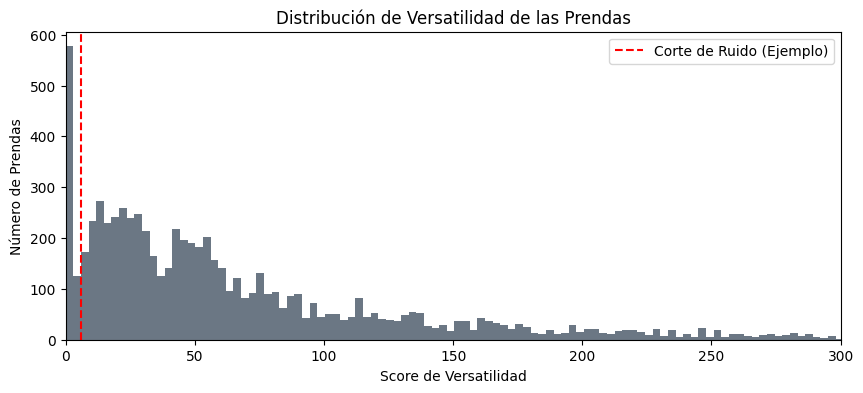

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.hist(df_scores['versatilidad'], bins=500, color='#2c3e50', alpha=0.7)
plt.title('Distribución de Versatilidad de las Prendas')
plt.xlabel('Score de Versatilidad')
plt.xlim((0,300))
plt.ylabel('Número de Prendas')
plt.axvline(x=6, color='r', linestyle='--', label='Corte de Ruido (Ejemplo)')
plt.legend()
plt.show()

In [22]:
for nodo_id in G_corto.nodes():
    info = prendas_c[nodo_id]
    G_corto.nodes[nodo_id]['nivel'] = info['nivel']

In [23]:
versatilidad_map = nx.get_node_attributes(G_corto, 'versatilidad')
importancia_map = nx.get_node_attributes(G_corto, 'importance_score') 
nivel_map = nx.get_node_attributes(G_corto, 'nivel')
nodos_vip_set = {n for n, v in versatilidad_map.items() if v > 6} 
anclas = [n for n in nodos_vip_set if nivel_map.get(n) == 1]

print(f"Busqueda para {len(anclas)} prendas de Nivel 1")
looks_finales = []
def registrar_look(items):
    """Calcula pesos y añade el look a la lista centralizada."""
    n1, n2, n3 = items
    w1 = G_corto[n1][n2]['weight']
    w2 = G_corto[n1][n3]['weight']
    w3 = G_corto[n2][n3]['weight']
    score_aristas = (w1 + w2 + w3) / 3
    
    # 2. Variables de los Nodos (Versatilidad y 'La Otra')
    versatilidades = [versatilidad_map.get(i, 0) for i in items]
    importancias = [importancia_map.get(i, 0) for i in items]
    looks_finales.append({
        'items': items,
        'niveles': [nivel_map[n1], nivel_map[n2], nivel_map[n3]],
        'score': round(score_aristas, 4),
        'versatilidad_total': round(sum(versatilidades), 2),
        'importancia_total': round(sum(importancias), 4),
        'vals_versatilidad': [round(v, 1) for v in versatilidades]})

for n1 in anclas:
    vecinos = list(G_corto.neighbors(n1))
    candidatos_v2 = sorted(
        [n for n in vecinos if n in nodos_vip_set and nivel_map.get(n) == 2],
        key=lambda x: G_corto[n1][x]['weight'], reverse=True)[:100]
    candidatos_v3 = sorted(
        [n for n in vecinos if n in nodos_vip_set and nivel_map.get(n) == 3],
        key=lambda x: G_corto[n1][x]['weight'], reverse=True)[:100]
    set_v2 = set(candidatos_v2)
    set_v3 = set(candidatos_v3)
    
    # CASO A: CLÁSICO (1-2-3)
    for n2 in candidatos_v2:
        match_n3 = set(G_corto.neighbors(n2)).intersection(set_v3)
        for n3 in match_n3:
            registrar_look([n1, n2, n3])
            
    # CASO B: LAYERING (1-2-2)
    for ta in candidatos_v2:
        match_tb = set(G_corto.neighbors(ta)).intersection(set_v2)
        for tb in match_tb:
            if ta < tb: 
                registrar_look([n1, ta, tb])
                
    # CASO C: EXTERIOR (1-3-3)
    for ca in candidatos_v3:
        match_cb = set(G_corto.neighbors(ca)).intersection(set_v3)
        for cb in match_cb:
            if ca < cb: 
                registrar_look([n1, ca, cb])

df_looks = pd.DataFrame(looks_finales)
df_looks['hash_items'] = df_looks['items'].apply(tuple)
df_looks = df_looks.drop_duplicates(subset=['hash_items']).drop(columns=['hash_items'])
df_looks = df_looks.sort_values(['score', 'versatilidad_total'], ascending=[False, False])
print(f"Looks unicos: {len(df_looks)}")

Busqueda para 2463 prendas de Nivel 1
Looks unicos: 3219758


In [24]:
df_looks

,items,niveles,score,versatilidad_total,importancia_total,vals_versatilidad
1574450,"[3526, 3413, 781]","[1, 2, 3]",0.880,1926.42,0.1153,"[175.2, 476.7, 1274.4]"
1577879,"[3528, 3413, 781]","[1, 2, 3]",0.880,1916.22,0.1142,"[165.0, 476.7, 1274.4]"
1574430,"[3526, 3412, 781]","[1, 2, 3]",0.880,1915.64,0.1140,"[175.2, 466.0, 1274.4]"
1577855,"[3528, 3412, 781]","[1, 2, 3]",0.880,1905.44,0.1130,"[165.0, 466.0, 1274.4]"
1576082,"[3527, 3412, 781]","[1, 2, 3]",0.880,1893.88,0.1090,"[153.5, 466.0, 1274.4]"
...,...,...,...,...,...,...
1091719,"[2377, 4939, 7021]","[1, 2, 2]",0.464,51.79,0.0005,"[10.7, 18.8, 22.3]"
1091714,"[2377, 4938, 7020]","[1, 2, 2]",0.464,45.23,0.0005,"[10.7, 18.8, 15.7]"
1091718,"[2377, 4939, 7020]","[1, 2, 2]",0.464,45.23,0.0005,"[10.7, 18.8, 15.7]"
1091712,"[2377, 4938, 7016]","[1, 2, 2]",0.464,40.32,0.0004,"[10.7, 18.8, 10.8]"


In [25]:
corte_suave = df_looks['score'].quantile(0.40) 
print(f"Media: {df_looks['score'].mean():.4f}")
print(f"Corte 60%: {corte_suave:.4f}")
looks_filtro = df_looks[df_looks['score'] >= corte_suave]
print(f" Antes: {len(df_looks)} looks")
print(f" Ahora: {len(looks_filtro)} looks (Conservado el {len(looks_filtro)/len(df_looks):.1%} de los datos)")

Media: 0.6315
Corte 60%: 0.6133
 Antes: 3219758 looks
 Ahora: 2051768 looks (Conservado el 63.7% de los datos)


In [26]:
print(f'Number of nodes: {G_corto.number_of_nodes()}')
print(f'Number of edges: {G_corto.number_of_edges()}')
print(f'Average node degree: {G_corto.number_of_edges() / G_corto.number_of_nodes():.2f}')
isolated_nodes = list(nx.isolates(G_corto))
print(f'Has isolated nodes: {len(isolated_nodes) > 0}')
print(f'Has self-loops: {nx.number_of_selfloops(G_corto) > 0}')
print(f'Is undirected: {not G_corto.is_directed()}')

Number of nodes: 7555
Number of edges: 1140880
Average node degree: 151.01
Has isolated nodes: False
Has self-loops: False
Is undirected: True


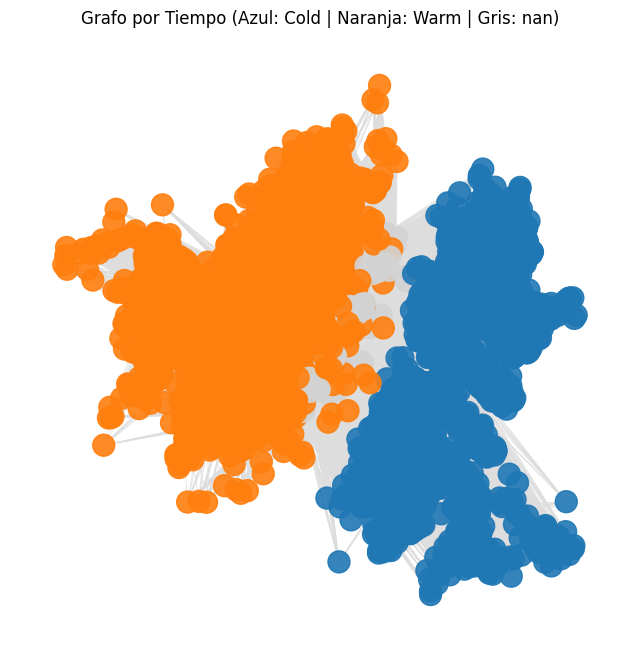

In [27]:
import matplotlib.pyplot as plt
mapa_colores_clima = {'cold': '#1f77b4','warm': '#ff7f0e','nan': '#d3d3d3'}  
colores_tiempo = []
for node_id in G_corto.nodes():
    info_prenda = prendas_c.get(node_id, {})
    clima_raw = info_prenda.get('tiempo') 
    if isinstance(clima_raw, set):
        clima = next(iter(clima_raw), None) if clima_raw else None
    else:
        clima = clima_raw
    if clima:
        clima = str(clima).lower().strip()
    colores_tiempo.append(mapa_colores_clima.get(clima, '#d3d3d3'))
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw(G_corto, ax=ax,node_color=colores_tiempo, 
    node_size=250, width=0.6,edge_color='#dddddd',alpha=0.9)
plt.title("Grafo por Tiempo (Azul: Cold | Naranja: Warm | Gris: nan)")
plt.show()

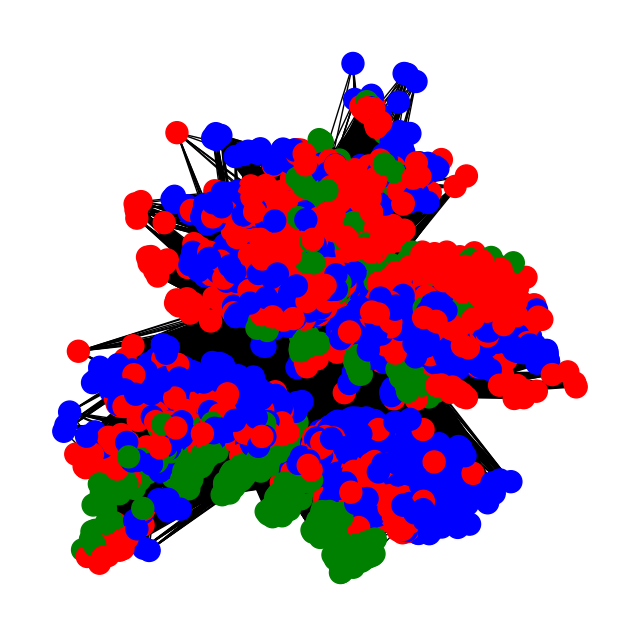

In [28]:
fig, ax = plt.subplots(figsize = (8,8))
color_nodo1000 = [colores[i-1] for i in df_grafo['nivel']]
nx.draw(G_corto, node_color=color_nodo1000, node_size=250,width=1)

In [29]:
color_nodo = {
    row.ID_nuevo: colores[row.nivel - 1]
    for _, row in df_grafo.iterrows()}

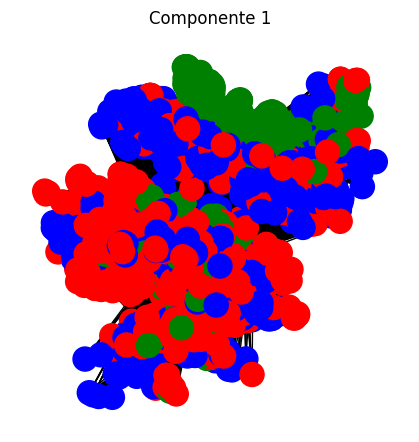

In [30]:
componentes = nx.connected_components(G_corto)
for i, comp in enumerate(componentes):
    subG = G_corto.subgraph(comp)
    colores_sub = [color_nodo[n] for n in subG.nodes()]
    plt.figure(figsize=(4, 4))
    nx.draw(subG,with_labels=False,
        node_size=300,node_color=colores_sub)
    plt.title(f"Componente {i+1}")
    plt.show()

In [31]:
triangulos_dict = nx.triangles(G_corto)
triangulos_dict

{1: 8775,
 2: 5230,
 3: 1601,
 4: 989,
 5: 3057,
 6: 5419,
 7: 3447,
 8: 2334,
 9: 2149,
 10: 7782,
 11: 2558,
 12: 3632,
 13: 5934,
 14: 4584,
 15: 3183,
 16: 8858,
 17: 10004,
 18: 12716,
 19: 2097,
 20: 3891,
 21: 12319,
 22: 3567,
 23: 12716,
 24: 12319,
 25: 2953,
 26: 3831,
 27: 3647,
 28: 2550,
 29: 3585,
 30: 2825,
 31: 1080,
 32: 1539,
 33: 689,
 34: 2079,
 35: 1597,
 36: 8858,
 37: 3891,
 38: 10004,
 39: 2668,
 40: 1234,
 41: 4441,
 42: 20475,
 43: 10124,
 44: 29158,
 45: 1626,
 46: 4720,
 47: 13051,
 48: 816,
 49: 9272,
 50: 2197,
 51: 12039,
 52: 10374,
 53: 8487,
 54: 10374,
 55: 8487,
 56: 3059,
 57: 12039,
 58: 3546,
 59: 4033,
 60: 24917,
 61: 22710,
 62: 17656,
 63: 8196,
 64: 16957,
 65: 56,
 66: 87,
 67: 78,
 68: 96,
 69: 96,
 70: 804,
 71: 1637,
 72: 1741,
 73: 1370,
 74: 1364,
 75: 9783,
 76: 14979,
 77: 11108,
 78: 8668,
 79: 6480,
 80: 5428,
 81: 13430,
 82: 7649,
 83: 472,
 84: 551,
 85: 543,
 86: 1741,
 87: 96,
 88: 1364,
 89: 96,
 90: 78,
 91: 1637,
 92: 8957,

In [32]:
df_grafo['num_triangulos'] = df_grafo['ID_nuevo'].map(triangulos_dict).fillna(0).astype(int)

In [33]:
df_grafo

,ID_color,nivel,Color,color_nivel,Temporada,Marca,ID,tipo_prenda2,long_cm1,sleeve_long_cm1,...,print3,style1,style2,style3,fit1,fit2,weather,Salto_talla,ID_nuevo,num_triangulos
0,6549c1b1-989e-432a-bdc9-b603c438b310yellow,2,yellow,54,9,BRAND119,6549c1b1-989e-432a-bdc9-b603c438b310,jersey,58.0,58.0,...,NaN,classic,boho,NaN,loose,NaN,warm,3,1,8775
23,6549c1b1-989e-432a-bdc9-b603c438b310ecru,2,ecru,51,9,BRAND119,6549c1b1-989e-432a-bdc9-b603c438b310,jersey,58.0,58.0,...,NaN,classic,boho,NaN,loose,NaN,warm,3,2,5230
46,6549c1b1-989e-432a-bdc9-b603c438b310ecru,2,ecru,51,9,BRAND119,6549c1b1-989e-432a-bdc9-b603c438b310,jersey,58.0,58.0,...,NaN,classic,boho,NaN,loose,NaN,warm,1,3,1601
69,6549c1b1-989e-432a-bdc9-b603c438b310blue_dark,2,blue_dark,100,9,BRAND119,6549c1b1-989e-432a-bdc9-b603c438b310,jersey,58.0,58.0,...,NaN,classic,boho,NaN,loose,NaN,warm,1,4,989
92,6549c1b1-989e-432a-bdc9-b603c438b310blue_dark,2,blue_dark,100,9,BRAND119,6549c1b1-989e-432a-bdc9-b603c438b310,jersey,58.0,58.0,...,NaN,classic,boho,NaN,loose,NaN,warm,4,5,3057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198488,22efc184-5ecb-401d-8dea-9569ceae492dpurple,1,purple,112,9,BRAND15,22efc184-5ecb-401d-8dea-9569ceae492d,pantalones,38.0,NaN,...,NaN,boho,classic,NaN,straight,NaN,warm,2,7551,61205
198511,22efc184-5ecb-401d-8dea-9569ceae492dred,1,red,12,9,BRAND15,22efc184-5ecb-401d-8dea-9569ceae492d,pantalones,38.0,NaN,...,NaN,boho,classic,NaN,straight,NaN,warm,2,7552,57831
198534,22efc184-5ecb-401d-8dea-9569ceae492dpurple,1,purple,112,9,BRAND15,22efc184-5ecb-401d-8dea-9569ceae492d,pantalones,38.0,NaN,...,NaN,boho,classic,NaN,straight,NaN,warm,3,7553,85388
198557,22efc184-5ecb-401d-8dea-9569ceae492dred,1,red,12,9,BRAND15,22efc184-5ecb-401d-8dea-9569ceae492d,pantalones,38.0,NaN,...,NaN,boho,classic,NaN,straight,NaN,warm,3,7554,79624


In [34]:
triangulos = [c for c in nx.cycle_basis(G_corto) if len(c) == 3]
len(triangulos)

414068

In [35]:
triangulos_validos = []
for tri in triangulos:
    niveles = [prendas_c[n]['nivel'] for n in tri]
    # condición: exactamente un nivel 1
    if niveles.count(1) == 1 and all(n in [1,2,3] for n in niveles):
        # condición adicional: los otros dos deben ser 2 o 3
        niveles_sin_1 = [n for n in niveles if n != 1]
        if all(n in [2, 3] for n in niveles_sin_1):
            triangulos_validos.append(tri)

In [36]:
len(triangulos_validos)

398707

In [37]:
# 1. Contamos en cuántos triángulos participa cada prenda (Métrica de versatilidad)
triangulos_dict = nx.triangles(G_corto)
df_grafo['num_triangulos'] = df_grafo['ID_nuevo'].map(triangulos_dict).fillna(0).astype(int)

print(f"📊 Métrica de triángulos añadida al DataFrame para {len(df_grafo)} prendas.")

📊 Métrica de triángulos añadida al DataFrame para 7555 prendas.


In [38]:
import itertools
triangulos_validos = []
nodos_con_triangulos = [n for n, count in triangulos_dict.items() if count > 0]
print(f"🔍 Procesando {len(nodos_con_triangulos)} nodos con potencial de outfit...")
for n1 in nodos_con_triangulos:
    if prendas_c[n1]['nivel'] == 1:
        vecinos = list(G_corto.neighbors(n1))
        for n2, n3 in itertools.combinations(vecinos, 2):
            if G_corto.has_edge(n2, n3):
                tri = [n1, n2, n3]                
                niveles = [prendas_c[n]['nivel'] for n in tri]
                if niveles.count(1) == 1 and all(n in [1,2,3] for n in niveles):
                    niveles_sin_1 = [n for n in niveles if n != 1]
                    if all(n in [2, 3] for n in niveles_sin_1):
                        w12 = G_corto[n1][n2]['weight']
                        w13 = G_corto[n1][n3]['weight']
                        w23 = G_corto[n2][n3]['weight']
                        score = round((w12 + w13 + w23) / 3, 4)
                        triangulos_validos.append({'ids': tri, 'score': score})
print(f"✅ ¡Éxito! Triángulos válidos encontrados: {len(triangulos_validos)}")

🔍 Procesando 7555 nodos con potencial de outfit...
✅ ¡Éxito! Triángulos válidos encontrados: 29453875


In [39]:
df_outfits = pd.DataFrame(triangulos_validos)
ids_df = pd.DataFrame(df_outfits['ids'].tolist(), columns=['prenda_1', 'prenda_2', 'prenda_3']).astype(np.int64)
df_final = pd.concat([ids_df, df_outfits['score'].astype(np.float32)], axis=1)
df_final = df_final.sort_values('score', ascending=False).reset_index(drop=True)
df_final.to_csv('looks.csv',index=False)

In [40]:
df_final.shape

(29453875, 4)

In [41]:
triangulos_sorted = sorted(triangulos_validos, key=lambda x: x['score'], reverse=True)
for i, outfit in enumerate(triangulos_sorted[:5]):
    print(f"Outfit Gold #{i+1} (Score: {outfit['score']}): {outfit['ids']}")

Outfit Gold #1 (Score: 0.88): [137, 404, 5606]
Outfit Gold #2 (Score: 0.88): [137, 409, 5606]
Outfit Gold #3 (Score: 0.88): [287, 1357, 3412]
Outfit Gold #4 (Score: 0.88): [287, 1358, 3412]
Outfit Gold #5 (Score: 0.88): [287, 2055, 3412]


In [42]:
triangulos_validos[100000:100020]

[{'ids': [32, 3549, 4940], 'score': 0.64},
 {'ids': [32, 3549, 4941], 'score': 0.64},
 {'ids': [32, 3549, 5315], 'score': 0.6667},
 {'ids': [32, 3549, 5316], 'score': 0.6667},
 {'ids': [32, 3549, 5319], 'score': 0.6667},
 {'ids': [32, 3549, 5439], 'score': 0.7733},
 {'ids': [32, 3549, 5442], 'score': 0.7733},
 {'ids': [32, 3549, 5452], 'score': 0.6667},
 {'ids': [32, 3549, 5455], 'score': 0.6667},
 {'ids': [32, 3549, 5474], 'score': 0.6667},
 {'ids': [32, 3549, 5479], 'score': 0.6667},
 {'ids': [32, 3549, 5500], 'score': 0.6667},
 {'ids': [32, 3549, 5513], 'score': 0.6667},
 {'ids': [32, 3549, 5516], 'score': 0.6667},
 {'ids': [32, 3549, 5872], 'score': 0.6667},
 {'ids': [32, 3549, 5874], 'score': 0.6667},
 {'ids': [32, 3549, 5875], 'score': 0.6667},
 {'ids': [32, 3549, 5876], 'score': 0.6667},
 {'ids': [32, 3549, 5877], 'score': 0.6667},
 {'ids': [32, 3549, 5878], 'score': 0.6667}]

In [43]:
ids_interes = {3526, 3413, 781}
datos_df = []
for node_id in ids_interes:
    if node_id in prendas_c:
        info = prendas_c[node_id].copy()
        info['styles'] = ", ".join(info['styles']) if info['styles'] else ""
        info['prints'] = ", ".join(info['prints']) if info['prints'] else ""
        info['fits'] = ", ".join(info['fits']) if info['fits'] else ""
        datos_df.append(info)
df_analisis = pd.DataFrame(datos_df)
df_analisis = df_analisis.sort_values('id')
print(df_analisis.to_string())

     id sub_category  long_cm sleeve_long_cm  color_nivel  nivel tipo_prenda        styles  has_style                     prints  is_print      fits  tiempo  talla
1   781      bufanda      NaN           None           54      3     bufanda  casual, boho       True  checked, vertical_stripes      True            {warm}    100
0  3413     camiseta     65.0           None           12      2    camiseta         night       True               animal_print      True  straight  {warm}      3
2  3526        falda     81.0           None           93      1       falda       classic       True                     smooth      True  straight  {warm}      3


In [44]:
nx.write_gexf(G_corto, "grafo_prendas.gexf")

In [45]:
G_corto = nx.read_gexf("grafo_prendas.gexf")
print(f"Nodos cargados: {G_corto.number_of_nodes()}")
print(f"Aristas cargadas: {G_corto.number_of_edges()}")

Nodos cargados: 7555
Aristas cargadas: 1140880


In [48]:
import pandas as pd
from collections import Counter

# 1. CARGAR EL CSV
df_looks = pd.read_csv('looks.csv')
print(f"📂 Cargados {len(df_looks)} looks desde el CSV")

# 2. ORDENAR POR SCORE (mayor a menor)
df_looks = df_looks.sort_values('score', ascending=False).reset_index(drop=True)
# Guardar la posición original en el ranking
df_looks['posicion_original'] = df_looks.index + 1  # +1 para que empiece en 1
print(f"✅ Looks ordenados por score")

# 3. DEFINIR LÍMITES PARA DIVERSIDAD
MAX_MISMO_COLOR = 3  # Máximo 3 looks con el mismo color predominante
MAX_MISMO_TIPO = 5   # Máximo 5 looks con el mismo tipo de prenda

# 4. SELECCIONAR 10 LOOKS CON RESTRICCIONES
looks_seleccionados = []
prendas_usadas = set()
contador_colores = Counter()  # Cuenta colores predominantes por look
contador_tipos = Counter()    # Cuenta tipos de prenda usados

print("\n🎯 Seleccionando 10 looks únicos y diversos...\n")

for idx, row in df_looks.iterrows():
    if len(looks_seleccionados) >= 10:
        break
    
    p1 = int(row['prenda_1'])
    p2 = int(row['prenda_2'])
    p3 = int(row['prenda_3'])
    
    # RESTRICCIÓN 1: No repetir prendas
    if p1 in prendas_usadas or p2 in prendas_usadas or p3 in prendas_usadas:
        continue
    
    # Obtener info de cada prenda
    color_p1 = prendas_c[p1].get('color_nivel', 'unknown')
    color_p2 = prendas_c[p2].get('color_nivel', 'unknown')
    color_p3 = prendas_c[p3].get('color_nivel', 'unknown')
    
    tipo_p1 = prendas_c[p1].get('tipo_prenda', 'unknown')
    tipo_p2 = prendas_c[p2].get('tipo_prenda', 'unknown')
    tipo_p3 = prendas_c[p3].get('tipo_prenda', 'unknown')
    
    estilo_p1 = prendas_c[p1].get('styles', [])
    estilo_p2 = prendas_c[p2].get('styles', [])
    estilo_p3 = prendas_c[p3].get('styles', [])
    
    # Convertir listas de estilos a string
    estilo_p1_str = ", ".join(estilo_p1) if estilo_p1 else "sin_estilo"
    estilo_p2_str = ", ".join(estilo_p2) if estilo_p2 else "sin_estilo"
    estilo_p3_str = ", ".join(estilo_p3) if estilo_p3 else "sin_estilo"
    
    # RESTRICCIÓN 2: Diversidad de colores
    # Determinar color predominante del outfit (el que más se repite)
    colores_outfit = [color_p1, color_p2, color_p3]
    color_predominante = Counter(colores_outfit).most_common(1)[0][0]
    
    if contador_colores[color_predominante] >= MAX_MISMO_COLOR:
        continue
    
    # RESTRICCIÓN 3: Evitar tipos de prenda repetidos
    # Verificar si algún tipo ya está usado demasiadas veces
    tipos_outfit = [tipo_p1, tipo_p2, tipo_p3]
    skip_look = False
    for tipo in tipos_outfit:
        if contador_tipos[tipo] >= MAX_MISMO_TIPO:
            skip_look = True
            break
    
    if skip_look:
        continue
    
    # ✅ Outfit válido
    looks_seleccionados.append({
        'posicion_top10': len(looks_seleccionados) + 1,  # Nueva posición en el top 10
        'posicion_original': int(row['posicion_original']),  # Posición original en el ranking completo
        'prenda_1': p1,
        'prenda_2': p2,
        'prenda_3': p3,
        'score': row['score'],
        'color_p1': color_p1,
        'color_p2': color_p2,
        'color_p3': color_p3,
        'tipo_p1': tipo_p1,
        'tipo_p2': tipo_p2,
        'tipo_p3': tipo_p3,
        'estilo_p1': estilo_p1_str,
        'estilo_p2': estilo_p2_str,
        'estilo_p3': estilo_p3_str
    })
    
    # Actualizar contadores
    prendas_usadas.add(p1)
    prendas_usadas.add(p2)
    prendas_usadas.add(p3)
    
    contador_colores[color_predominante] += 1
    contador_tipos[tipo_p1] += 1
    contador_tipos[tipo_p2] += 1
    contador_tipos[tipo_p3] += 1
    
    print(f"✅ Look #{len(looks_seleccionados)} | Pos.Original: {int(row['posicion_original'])} | Score: {row['score']:.4f} | Color: {color_predominante} | Tipos: {tipos_outfit}")

# 5. GUARDAR RESULTADO FINAL
df_looks_finales = pd.DataFrame(looks_seleccionados)
df_looks_finales.to_csv('looks_10_finales.csv', index=False)

print(f"\n🎉 Total: {len(looks_seleccionados)} looks seleccionados")
print(f"📊 Distribución de colores: {dict(contador_colores)}")
print(f"📊 Distribución de tipos: {dict(contador_tipos)}")
print("\n")
print(df_looks_finales[['posicion_top10', 'posicion_original', 'score', 'prenda_1', 'prenda_2', 'prenda_3']])

📂 Cargados 29453875 looks desde el CSV
✅ Looks ordenados por score

🎯 Seleccionando 10 looks únicos y diversos...

✅ Look #1 | Pos.Original: 1 | Score: 0.8800 | Color: 94 | Tipos: ['pantalones', 'bufanda', 'camiseta']
✅ Look #2 | Pos.Original: 3 | Score: 0.8800 | Color: 51 | Tipos: ['falda', 'chaqueta', 'camiseta']
✅ Look #3 | Pos.Original: 7 | Score: 0.8800 | Color: 93 | Tipos: ['falda', 'chaqueta', 'camiseta']
✅ Look #4 | Pos.Original: 22 | Score: 0.8800 | Color: 30 | Tipos: ['pantalones', 'jersey', 'chaqueta']
✅ Look #5 | Pos.Original: 30 | Score: 0.8800 | Color: 12 | Tipos: ['falda', 'camiseta', 'jersey']
✅ Look #6 | Pos.Original: 49 | Score: 0.8800 | Color: 30 | Tipos: ['pantalones', 'jersey', 'chaqueta']
✅ Look #7 | Pos.Original: 61 | Score: 0.8800 | Color: 112 | Tipos: ['pantalones', 'bufanda', 'camiseta']
✅ Look #8 | Pos.Original: 576 | Score: 0.8800 | Color: 30 | Tipos: ['pantalones', 'jersey', 'chaqueta']
✅ Look #9 | Pos.Original: 1018 | Score: 0.8533 | Color: 46 | Tipos: ['f

In [51]:
ids_interes = {6972, 2320, 3412}
datos_df = []
for node_id in ids_interes:
    if node_id in prendas_c:
        info = prendas_c[node_id].copy()
        info['styles'] = ", ".join(info['styles']) if info['styles'] else ""
        info['prints'] = ", ".join(info['prints']) if info['prints'] else ""
        info['fits'] = ", ".join(info['fits']) if info['fits'] else ""
        datos_df.append(info)
df_analisis = pd.DataFrame(datos_df)
df_analisis = df_analisis.sort_values('id')
print(df_analisis.to_string())

     id sub_category  long_cm sleeve_long_cm  color_nivel  nivel tipo_prenda          styles  has_style        prints  is_print      fits  tiempo  talla
0  2320      bufanda      NaN           None           51      3     bufanda   classic, boho       True     geometric      True            {warm}    100
2  3412     camiseta     65.0           None           12      2    camiseta           night       True  animal_print      True  straight  {warm}      4
1  6972   pantalones     96.0           None           94      1  pantalones  casual, street       True        smooth      True  straight  {warm}      3
